# Excercises Electric Machinery Fundamentals
## Chapter 2

## Problem 2-13

In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


### Description

**Correction! In the book a transformer ratio of 14,000/480-V is given. This should be 14,400/480-V which is also used in the following calculations.**

A 14,400/480-V three-phase Y-$\Delta$-connected transformer bank consists of three identical 100-kVA 8314/480-V transformers. It is supplied with power directly from a large constant-voltage bus. In the short-circuit test, the recorded values on the high-voltage side for one of these transformers are:

$$V_{SC} = 510\,V \qquad I_{SC} = 12.6\,A \qquad P_{SC} = 3000\,W$$

In [2]:
Sbase   = 100e3  # [VA]
Vp_ll   =  14400 # [V]  primary line-to-line volage of transformer bank
Vs_ll   =    480 # [V]  secondary line-to-line volage of transformer bank
Vp_ph   =   8314 # [V]  primary phase voltage of single transformer
Vs_ph   =    480 # [V]  secondary phase voltage of single transformer

#### (a)

If this bank delivers a rated load at 0.8 PF lagging and rated voltage

 * What is the line-to-line voltage on the primary of the transformer bank?

#### (b)

 * What is the voltage regulation under these conditions?

#### (c)

Assume that the primary phase voltage of this transformer is a constant 8314 V

 * Plot the secondary voltage as a function of load current for currents from no-load to full-load.
 * Repeat this process for power factors of 0.8 lagging, 1.0, and 0.8 leading.

#### (d)

 * Plot the voltage regulation of this transformer as a function of load current for currents from no-load to full-load. 
 * Repeat this process for power factors of 0.8 lagging, 1.0, and 0.8 leading.

#### (e)

 * Sketch the per-unit equivalent circuit of this transformer.

### SOLUTION

From the short-circuit information, it is possible to determine the per-phase impedance of the transformer bank referred to the high-voltage (primary) side. Note that the short-circuit information is given for one transformer of the three in the bank. The voltage across this transformer is:

In [3]:
Vphi_SC = 510 # [V]

the short-circuit phase current is:

In [4]:
Iphi_SC = 12.6 # [A]

and the power per phase is:

In [5]:
Pphi_SC = 3000.0 # [W]

Thus the per-phase impedance is:
$$|Z_\text{EQ}| = |R_\text{EQ} + jX_\text{EQ}| = \frac{V_{\phi,SC}}{I_{\phi,SC}}$$

In [6]:
Zeq = Vphi_SC / Iphi_SC
print('|Zeq| = {:.2f} Ω'.format(Zeq))

|Zeq| = 40.48 Ω


$$\theta = \arccos{\frac{P_{SC}}{V_{SC}I_{SC}}}$$

In [7]:
theta = arccos(Pphi_SC / (Vphi_SC*Iphi_SC))
print('theta = {:.1f}°'.format(theta/pi *180))

theta = 62.2°


In [8]:
ZEQ = Zeq * (cos(theta) + sin(theta)*1j)
print('ZEQ = {:.2f} Ω'.format(ZEQ))

ZEQ = 18.90+35.79j Ω


In [9]:
Req = ZEQ.real
Xeq = ZEQ.imag
print('''
Req = {:.2f} Ω
Xeq = j{:.2f} Ω
'''.format(Req, Xeq))


Req = 18.90 Ω
Xeq = j35.79 Ω



#### (a)

If this Y-$\Delta$ transformer bank delivers rated kVA (300 kVA) at 0.8 power factor lagging while the secondary voltage is at rated value, then each transformer delivers 100 kVA at a voltage of 480 V and 0.8 PF lagging. Referred to the primary side of one of the transformers, the load on each transformer is equivalent to 100 kVA at 8314 V and 0.8 PF lagging. The equivalent current flowing in the secondary of one transformer referred to the primary side is:

In [10]:
PF = 0.8
V_PHI_s = Vp_ph  # secondary phase voltage as referred by the primary side
I_phi_s = Sbase / abs(V_PHI_s)  # amplitude of current
I_PHI_s_angle = -arccos(PF)     # angle 
I_PHI_s = I_phi_s * (cos(I_PHI_s_angle) + sin(I_PHI_s_angle)*1j) # complex vector
print('I_PHI_s = {:.2f} A ∠{:.2f}°'.format(
            abs(I_PHI_s), I_PHI_s_angle/pi * 180))

I_PHI_s = 12.03 A ∠-36.87°


The voltage on the primary side of a single transformer is thus:
$$\vec{V}_{\phi,P} = \vec{V}'_{\phi,S} + \vec{I}'_{\phi,S}Z_{EQ,P}$$

In [11]:
V_PHI_p = V_PHI_s + I_PHI_s*ZEQ
V_PHI_p_angle = arctan(V_PHI_p.imag/V_PHI_p.real)
print('V_PHI_p = {:.0f} V ∠{:.2f}°'.format(
            abs(V_PHI_p), V_PHI_p_angle/pi * 180))

V_PHI_p = 8757 V ∠1.36°


**The line-to-line voltage on the primary of the transformer is:**

$$V_{LL,P} = \sqrt{3}V_{\phi,P}$$

In [12]:
Vll_p = sqrt(3) * abs(V_PHI_p)
print('''
Vll_p = {:.2f} kV
================
'''.format(Vll_p/1000))


Vll_p = 15.17 kV



#### (b)

**The voltage regulation of the transformer is:**

$$VR = \frac{V_{\phi,P}-V'_{\phi,S}}{V'_{\phi,S}} \cdot 100\%$$

In [13]:
V_PHI_s

8314

In [14]:
VR = (abs(V_PHI_p) - abs(V_PHI_s)) / abs(V_PHI_s) * 100
print('''
VR = {:.2f} %
===========
'''.format(VR))


VR = 5.32 %



#### (c)

The base values of this transformer bank on the primary side are:

In [15]:
Sbase_3 = 300e3  # [VA]
Vll_base = Vp_ll
Vll_base

14400

$$I_{L_\text{base}} = \frac{S_\text{base}}{\sqrt{3}V_{LL_\text{base}}}$$

In [16]:
Il_base = Sbase_3 / (sqrt(3)*Vll_base)
print('Il_base = {:.2f} A'.format(Il_base))

Il_base = 12.03 A


The transformer bank is connected in "Y" which means for the base phase current that:

$$I_{\phi_\text{base}} = \frac{I_{L_\text{base}}}{\sqrt{3}}$$

In [17]:
Iphi_base = Il_base / sqrt(3)
print('Iphi_base = {:.2f} A'.format(Iphi_base))

Iphi_base = 6.94 A


This sort of repetitive operation is best performed with Python. Note that in this case, the problem is specifying a fixed primary phase voltage of 8314 V, and asking what the secondary voltage will be as a function of load. Therefore, we must subtract the voltage drop inside the transformer at each load, and convert the resulting voltage from the primary side to the secondary (low voltage) side.

Define values for this transformer:

In [18]:
VL = Vp_ll                       # [V] primary line voltage 
VP = VL / sqrt(3)                # [V] primary phase voltage
amps = linspace(0, Il_base, 100) # [A] phase current values
# Req is Equivalent R, which is already defined
# Xeq is Equivalent X, which is already defined

Calculate the current values for the three power factors. 

In [19]:
re = 0.85
im = sin(arccos(re))
I = amps * array ([[re - im*1j],  # lagging
                   [1.0],         # unity
                   [re + im*1j]]) # leading

Calculate secondary phase voltage referred to the primary side for each current and power factor.

In [20]:
aVSP = VP - (Req*I + 1j*Xeq*I)

Refer the secondary phase voltages back to the secondary side using the turns ratio. Because this is a delta-connected secondary, this is also the line voltage.

In [21]:
a = Vp_ph/Vs_ph # turns ratio
VSP = aVSP / a

**Plot the secondary voltage versus load:**

<IPython.core.display.Javascript object>


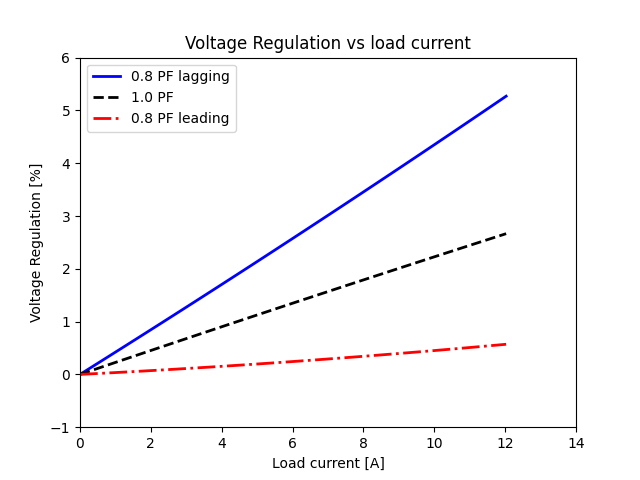

In [22]:
title('Secondary voltage vs load current')
xlabel('Load current [A]')
ylabel('Secondary voltage [V]')
plot(amps, abs(VSP[0,]), 'b-', 
     amps, abs(VSP[1,]), 'k--',
     amps, abs(VSP[2,]), 'r-.',
     linewidth = 2)
legend(('0.8 PF lagging', '1.0 PF', '0.8 PF leading'), loc=3);
grid()

#### (d)

This sort of repetitive operation is best performed with Python.

Calculate the voltage regulation:

In [23]:
VR = (VP - abs(aVSP)) / abs(aVSP) * 100

**Plot the voltage regulation versus load:**

In [24]:
title('Voltage Regulation vs load current')
xlabel('Load current [A]')
ylabel('Voltage Regulation [%]')
plot(amps, abs(VR[0,]), 'b-',
     amps, abs(VR[1,]), 'k--',
     amps, abs(VR[2,]), 'r-.',
     linewidth = 2)
legend(('0.8 PF lagging', '1.0 PF', '0.8 PF leading'), loc=0);
axis([0,14,-1,6])
grid()

#### (e)

The base phase voltage on the primary side is given by:
$$V_{\phi P_\text{base}} = \frac{V_{LP}}{\sqrt{3}}$$

In [25]:
Vlp = Vp_ll
Vphip_base = Vlp / sqrt(3)
print('Vphip_base = {:.3f} kV'.format(Vphip_base/1000))

Vphip_base = 8.314 kV


The base impedance on the primary side is given by:
$$Z_{\text{base}_S} = \frac{(V_{\phi_{\text{base}_S}})^2}{S_{\phi_\text{base}}}$$

In [26]:
Zbase_s = Vphip_base ** 2 / Sbase_3
print('Zbase_s = {:.0f} Ω'.format(Zbase_s))

Zbase_s = 230 Ω


The per-unit impedance is:

In [27]:
Req_pu = Req / Zbase_s
Xeq_pu = Xeq / Zbase_s
print('''
Req_pu = {:.3f} pu
Xeq_pu = {:.3f} pu
'''.format(Req_pu, Xeq_pu))


Req_pu = 0.082 pu
Xeq_pu = 0.155 pu



The excitation branch information was not given for the transformer.

**So the per-unit, per-phase equivalent circuit of the transformer bank is shown below:**

<img src="figs/Problem_2-13.jpg" width="60%">